# Trabajo Práctico: Ecuaciones Diferenciales

### Integrantes: Berretta Tomás, Bruno Tomás, Ferrari Ignacio, Kinderknetch Mauro

 ## Introducción: 
En este trabajo se realiza un experimento numérico para medir la efectividad de los métodos para la resolución numérica de ecuaciones diferenciales se ha elegido un problema cuya solución analítica es posible hallar usando los métodos que provee el Análisis Matemático.

## Algoritmos
### Solución analítica:

y´´´ + 2y´´ - y´ - 2y = e^x con y(0) = 1; y´(0) = -1; y´´(0) = 0

Solución: 1/36 e^(-2 x) (-16 + 63 e^x + e^(3 x) (-11 + 6 x))

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


def analitica(x):
    return 1 / 36 * math.e ** (-2 * x) * (-16 + 63 * math.e ** x + math.e ** (3 * x) * (-11 + 6 * x))

### Código propuesto en Python:

In [3]:
def dydx(y, z, w, x):
    return z


def dzdx(y, z, w, x):
    return w


def dwdx(y, z, w, x):
    return math.pow(math.e, x) - 2 * w + z + 2 * y


def runge_kutta_system(f, g, e, x0, y0, z0, a, b, h):
    t = np.arange(a, b + h, h)
    n = len(t)
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    x[0] = x0
    y[0] = y0
    z[0] = z0
    for i in range(n - 1):
        k1 = h * f(x[i], y[i], z[i], t[i])
        l1 = h * g(x[i], y[i], z[i], t[i])
        m1 = h * e(x[i], y[i], z[i], t[i])
        k2 = h * f(x[i] + k1 / 2, y[i] + l1 / 2, z[i] + m1 / 2, t[i] + h / 2)
        l2 = h * g(x[i] + k1 / 2, y[i] + l1 / 2, z[i] + m1 / 2, t[i] + h / 2)
        m2 = h * e(x[i] + k1 / 2, y[i] + l1 / 2, z[i] + m1 / 2, t[i] + h / 2)
        k3 = h * f(x[i] + k2 / 2, y[i] + l2 / 2, z[i] + m2 / 2, t[i] + h / 2)
        l3 = h * g(x[i] + k2 / 2, y[i] + l2 / 2, z[i] + m2 / 2, t[i] + h / 2)
        m3 = h * e(x[i] + k2 / 2, y[i] + l2 / 2, z[i] + m2 / 2, t[i] + h / 2)
        k4 = h * f(x[i] + k3, y[i] + l3, z[i] + m3, t[i] + h)
        l4 = h * g(x[i] + k3, y[i] + l3, z[i] + m3, t[i] + h)
        m4 = h * e(x[i] + k3, y[i] + l3, z[i] + m3, t[i] + h)
        x[i + 1] = x[i] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        y[i + 1] = y[i] + (1 / 6) * (l1 + 2 * l2 + 2 * l3 + l4)
        z[i + 1] = z[i] + (1 / 6) * (m1 + 2 * m2 + 2 * m3 + m4)
    return t, x, y, z


def adams_bashforth_w(x0, y0, y1, y2, y3, y4, z0, z1, z2, z3, z4, w0, w1, w2, w3, w4, h, f):
    y = w4 + h / 720 * (1901 * f(y4, z4, w4, x0 + 4 * h) - 2774 * f(y3, z3, w3, x0 + 3 * h) + 2616 *
                        f(y2, z2, w2, x0 + 2 * h) - 1274 * f(y1, z1, w1, x0 + h) + 251 * f(y0, z0, w0, x0))
    return y


def adams_bashforth_y(x0, y0, y1, y2, y3, y4, z0, z1, z2, z3, z4, w0, w1, w2, w3, w4, h, f):
    y = y4 + h / 720 * (1901 * f(y4, z4, w4, x0 + 4 * h) - 2774 * f(y3, z3, w3, x0 + 3 * h) + 2616 *
                        f(y2, z2, w2, x0 + 2 * h) - 1274 * f(y1, z1, w1, x0 + h) + 251 * f(y0, z0, w0, x0))
    return y


def adams_bashforth_z(x0, y0, y1, y2, y3, y4, z0, z1, z2, z3, z4, w0, w1, w2, w3, w4, h, f):
    y = z4 + h / 720 * (1901 * f(y4, z4, w4, x0 + 4 * h) - 2774 * f(y3, z3, w3, x0 + 3 * h) + 2616 *
                        f(y2, z2, w2, x0 + 2 * h) - 1274 * f(y1, z1, w1, x0 + h) + 251 * f(y0, z0, w0, x0))
    return y


def adams_moulton(x0, y1, y2, y3, y4, y5, z1, z2, z3, z4, z5, w1, w2, w3, w4, w5, h, it, f, g, e):
    y = y5
    z = z5
    w = w5
    for i in range(it):
        y = y4 + h / 720 * (251 * f(y5, z5, w5, x0 + 5 * h) + 646 * f(y4, z4, w4, x0 + 4 * h) -
                            264 * f(y3, z3, w3, x0 + 3 * h) + 106 * f(y2, z2, w2, x0 + 2 * h) - 19 * f(y1, z1, w1, x0 +
                                                                                                       h))
        z = z4 + h / 720 * (251 * g(y5, z5, w5, x0 + 5 * h) + 646 * g(y4, z4, w4, x0 + 4 * h) -
                            264 * g(y3, z3, w3, x0 + 3 * h) + 106 * g(y2, z2, w2, x0 + 2 * h) - 19 * g(y1, z1, w1, x0 +
                                                                                                       h))
        w = w4 + h / 720 * (251 * e(y5, z5, w5, x0 + 5 * h) + 646 * e(y4, z4, w4, x0 + 4 * h) -
                            264 * e(y3, z3, w3, x0 + 3 * h) + 106 * e(y2, z2, w2, x0 + 2 * h) - 19 * e(y1, z1, w1, x0 +
                                                                                                       h))
        y5 = y
    return y, z, w


def adams_bashforth_moulton(x0, y0, y1, y2, y3, y4, z0, z1, z2, z3, z4, w0, w1, w2, w3, w4, h, it, corrections):
    for k in range(it):
        valW5 = adams_bashforth_w(x0, y0, y1, y2, y3, y4, z0, z1, z2, z3, z4, w0, w1, w2, w3, w4, h, dwdx)
        valY5 = adams_bashforth_y(x0, y0, y1, y2, y3, y4, z0, z1, z2, z3, z4, w0, w1, w2, w3, w4, h, dydx)
        valZ5 = adams_bashforth_z(x0, y0, y1, y2, y3, y4, z0, z1, z2, z3, z4, w0, w1, w2, w3, w4, h, dzdx)
        x0 = x0 + h
        y0 = y1
        y1 = y2
        y2 = y3
        y3 = y4
        y4 = valY5
        z0 = z1
        z1 = z2
        z2 = z3
        z3 = z4
        z4 = valZ5
        w0 = w1
        w1 = w2
        w2 = w3
        w3 = w4
        w4 = valW5
        y4, z4, w4 = adams_moulton(x0, y0, y1, y2, y3, y4, z0, z1, z2, z3, z4, w0, w1, w2, w3, w4,
                                   h, corrections, dydx, dzdx, dwdx)
    return x0 + 4 * h, y4


def predictor_corrector(f, g, e, y0, z0, w0, x0, h, x_limit, corrections):
    b = 4 * h + x0
    runge = runge_kutta_system(f, g, e, y0, z0, w0, x0, b, h)
    n = len(runge[0])
    i = int((x_limit - b) / h)

    bashforthMoultonResult = adams_bashforth_moulton(runge[0][n - 5], runge[1][n - 5], runge[1][n - 4], runge[1][n - 3],
                                        runge[1][n - 2],
                                        runge[1][n - 1], runge[2][n - 5],
                                        runge[2][n - 4], runge[2][n - 3], runge[2][n - 2], runge[2][n - 1],
                                        runge[3][n - 5],
                                        runge[3][n - 4], runge[3][n - 3],
                                        runge[3][n - 2], runge[3][n - 1], h, i, corrections)
    return bashforthMoultonResult

### Datos obtenidos:

Con h: 0.01
Con Método Predictor-Corrector


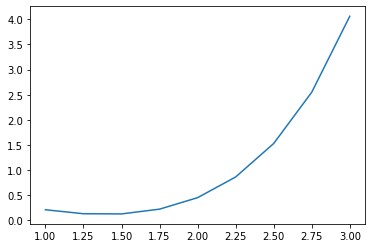

Con Solución Analítica


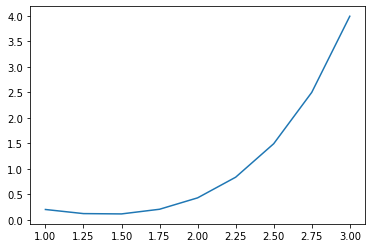

Con h: 0.05
Con Método Predictor-Corrector


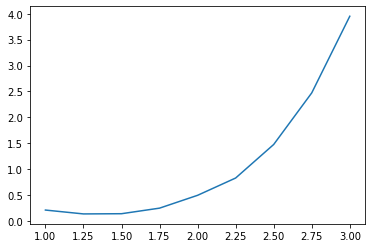

Con Solución Analítica


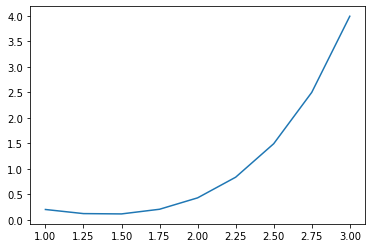

Con h: 0.1
Con Método Predictor-Corrector


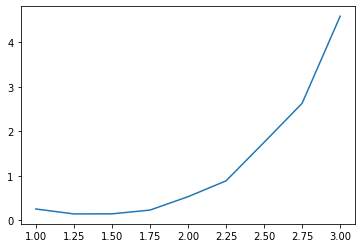

Con Solución Analítica


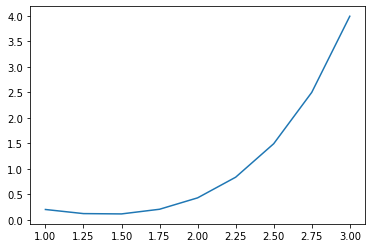

In [16]:
hArray = [0.01, 0.05, 0.1]
errores = []
for h in hArray:
    xArray = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
    yPredict = []
    yAnalitica = []
    for i in range(len(xArray)):
        pred = predictor_corrector(dydx, dzdx, dwdx, 1, -1, 0, 0, h, xArray[i], 100)
        yPredict.append(pred[1])
        yAnalitica.append(analitica(xArray[i]))
    print("Con h: "+str(h))
    print("Con Método Predictor-Corrector")
    plt.plot(xArray, yPredict)
    plt.show()
    print("Con Solución Analítica")
    plt.plot(xArray, yAnalitica)
    plt.show()
    error = np.subtract(yAnalitica , yPredict) 
    errores.append(error)


### Error:

In [31]:
for k in range(len(hArray)):
    print("Con h: "+  str(hArray[k])+"\n"+str(errores[k])+ "\n")

Con h: 0.01
[-0.00139213 -0.00285267 -0.00520828 -0.00882383 -0.01419964 -0.02202093
 -0.03322332 -0.04907981 -0.07131676]

Con h: 0.05
[-0.00454648 -0.01053587 -0.02072018 -0.03685767 -0.06135302  0.00925926
  0.01773866  0.02762265  0.03956311]

Con h: 0.1
[-0.05175984 -0.02141705 -0.02908441 -0.0222313  -0.09910667 -0.05034119
 -0.25901892 -0.1299242  -0.59235099]



## Conclusión
El método predictor-corrector de quinto orden acoplado con el método de Runge Kutta de 4 orden capaz de resolver sistemas de 3 ecuaciones diferenciales de primer orden presenta poco error al realizar saltos de h muy pequeños evidenciado en la comparación con la solución analítica, por lo que podemos concluir que es un método muy eficiente.